- Read the dataset

In [2]:
import pandas as pd
def Read_data(df: pd.DataFrame)->pd.DataFrame:
     
     try:
          return pd.read_csv(df , sep='\t', header=None, names=['label', 'message'])
     
     except Exception as e:
          print(f"Error: {e}")
          return None
     
     
df = Read_data(r"C:\Users\mk744\OneDrive - Poornima University\Desktop\Feature Scaling\Basic_statistics\sms+spam+collection\SMSSpamCollection")
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [21]:
df.to_csv("Email_spam_data.csv", index= False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

# Download NLTK resources
nltk.download('stopwords')

# Get dataset summary (basic info)
def get_dataset_summary(df):
    summary = {
        "Total Messages": df.shape[0],
        "Total Spam": df[df['label'] == 'spam'].shape[0],
        "Total Ham": df[df['label'] == 'ham'].shape[0],
        "Missing Values": df.isnull().sum().to_dict()
    }
    return summary



summary = get_dataset_summary(df)

print("Dataset Summary:", summary)


Dataset Summary: {'Total Messages': 5572, 'Total Spam': 747, 'Total Ham': 4825, 'Missing Values': {'label': 0, 'message': 0}}


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mk744\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


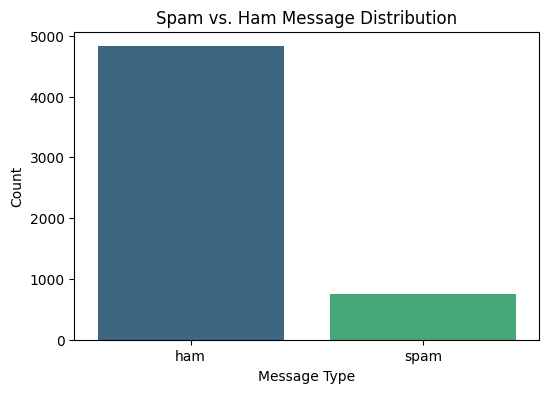

In [7]:
# Plot spam vs. ham message distribution
import warnings
warnings.filterwarnings('ignore')
def plot_message_distribution(df):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='label', palette='viridis')
    plt.title("Spam vs. Ham Message Distribution")
    plt.xlabel("Message Type")
    plt.ylabel("Count")
    plt.show()
    
plot_message_distribution(df)



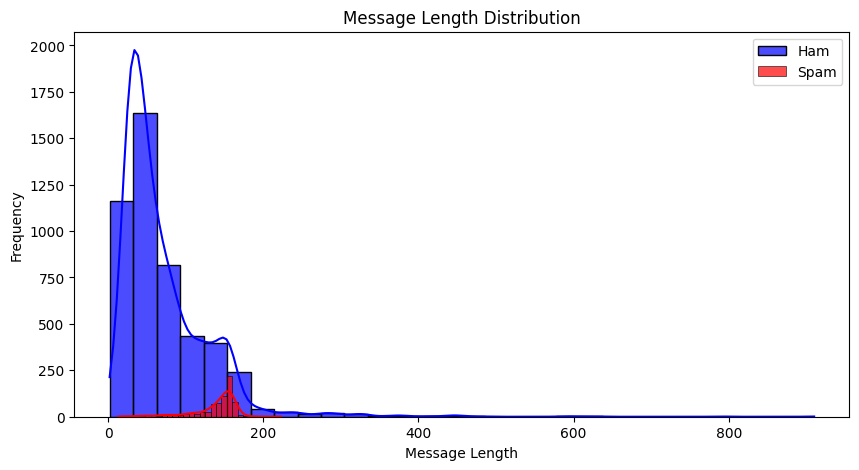

In [8]:
# Analyze message length
def analyze_message_length(df):
    df['message_length'] = df['message'].apply(len)
    
    # Plot message length distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(df[df['label'] == 'ham']['message_length'], bins=30, label="Ham", color='blue', alpha=0.7, kde=True)
    sns.histplot(df[df['label'] == 'spam']['message_length'], bins=30, label="Spam", color='red', alpha=0.7, kde=True)
    plt.legend()
    plt.title("Message Length Distribution")
    plt.xlabel("Message Length")
    plt.ylabel("Frequency")
    plt.show()
    
analyze_message_length(df)

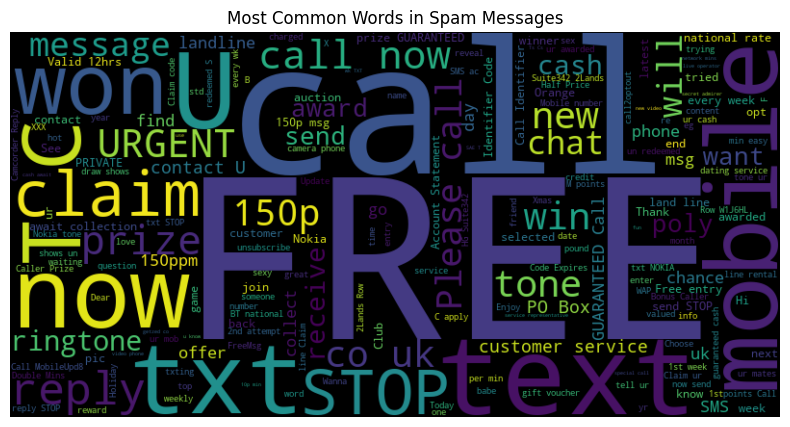

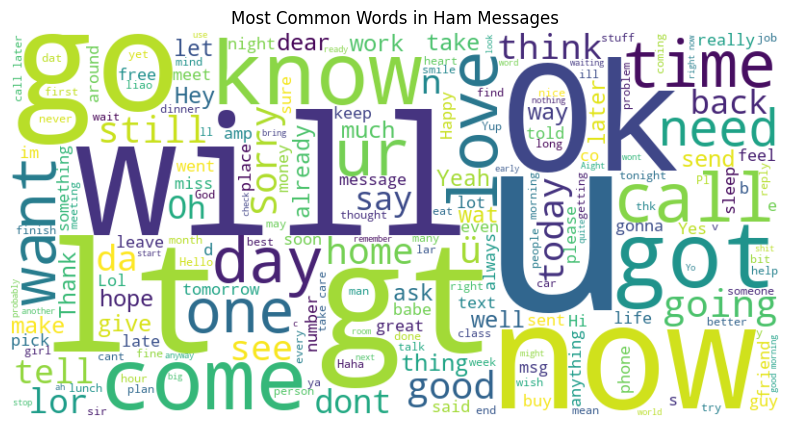

In [9]:
# Generate WordCloud for spam & ham messages
def generate_wordclouds(df):
    spam_words = " ".join(df[df['label'] == 'spam']['message'])
    ham_words = " ".join(df[df['label'] == 'ham']['message'])

    # Spam WordCloud
    plt.figure(figsize=(10, 5))
    wordcloud_spam = WordCloud(width=800, height=400, background_color="black").generate(spam_words)
    plt.imshow(wordcloud_spam, interpolation='bilinear')
    plt.axis("off")
    plt.title("Most Common Words in Spam Messages")
    plt.show()

    # Ham WordCloud
    plt.figure(figsize=(10, 5))
    wordcloud_ham = WordCloud(width=800, height=400, background_color="white").generate(ham_words)
    plt.imshow(wordcloud_ham, interpolation='bilinear')
    plt.axis("off")
    plt.title("Most Common Words in Ham Messages")
    plt.show()
    
generate_wordclouds(df)

In [10]:
# Get most common words in spam & ham messages
def get_common_words(df):
    stop_words = set(stopwords.words('english'))

    # Function to clean text
    def clean_text(text):
        text = text.lower().translate(str.maketrans("", "", string.punctuation))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        return words

    # Get common words in spam messages
    spam_words_list = []
    for msg in df[df['label'] == 'spam']['message']:
        spam_words_list.extend(clean_text(msg))
    spam_common = Counter(spam_words_list).most_common(10)

    # Get common words in ham messages
    ham_words_list = []
    for msg in df[df['label'] == 'ham']['message']:
        ham_words_list.extend(clean_text(msg))
    ham_common = Counter(ham_words_list).most_common(10)

    return {"Top 10 Spam Words": spam_common, "Top 10 Ham Words": ham_common}


In [14]:
common_words = get_common_words(df)

print("Common Words in Spam & Ham Messages:")
common_words

Common Words in Spam & Ham Messages:


{'Top 10 Spam Words': [('call', 347),
  ('free', 216),
  ('2', 173),
  ('txt', 150),
  ('u', 147),
  ('ur', 144),
  ('mobile', 123),
  ('text', 120),
  ('4', 119),
  ('stop', 115)],
 'Top 10 Ham Words': [('u', 985),
  ('im', 451),
  ('2', 309),
  ('get', 303),
  ('ltgt', 276),
  ('ok', 273),
  ('dont', 265),
  ('go', 250),
  ('ur', 246),
  ('ill', 238)]}

In [15]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Function to preprocess a single text message
def preprocess_text(text, stop_words, lemmatizer):
    """
    Preprocesses text by:
    1. Converting to lowercase
    2. Removing punctuation
    3. Tokenizing words
    4. Removing stopwords
    5. Applying lemmatization
    """
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stopwords & lemmatize
    return " ".join(words)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mk744\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mk744\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mk744\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
# Function to apply preprocessing to the dataset
def preprocess_dataset(df):
    """
    Applies text preprocessing to the 'message' column in the DataFrame.
    Returns the updated DataFrame with a new column 'cleaned_message'.
    """
    stop_words = set(stopwords.words('english'))  # Load stopwords
    lemmatizer = WordNetLemmatizer()  # Initialize lemmatizer
    df['cleaned_message'] = df['message'].apply(lambda x: preprocess_text(x, stop_words, lemmatizer))  # Apply function
    return df



# Apply preprocessing
df = preprocess_dataset(df)

df


,label,message,message_length,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah dont think go usf life around though
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,2nd time tried 2 contact u u £750 pound prize ...
5568,ham,Will ü b going to esplanade fr home?,36,ü b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,pity mood soany suggestion
5570,ham,The guy did some bitching but I acted like i'd...,125,guy bitching acted like id interested buying s...


In [17]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Download required NLTK resources (run once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize tools for preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text, stop_words, lemmatizer, stemmer):
    """
    Preprocesses a text message by:
    1. Converting to lowercase
    2. Removing punctuation
    3. Tokenizing into words
    4. Removing stopwords
    5. Applying lemmatization and stemming
    """
    # Lowercase and remove punctuation
    text = text.lower().translate(str.maketrans("", "", string.punctuation))
    
    # Tokenize text
    words = word_tokenize(text)
    
    # Remove stopwords, lemmatize, and stem words
    processed_words = []
    for word in words:
        if word not in stop_words:
            lemma = lemmatizer.lemmatize(word)
            stem = stemmer.stem(lemma)
            processed_words.append(stem)
    
    return " ".join(processed_words)

def preprocess_dataset(df):
    """
    Applies text preprocessing to the 'message' column in the DataFrame.
    Adds a new column 'cleaned_message'.
    """
    df['cleaned_message'] = df['message'].apply(
        lambda x: preprocess_text(x, stop_words, lemmatizer, stemmer)
    )
    return df


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mk744\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mk744\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mk744\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
# Preprocess the dataset
df = preprocess_dataset(df)
# ---------------------------
# Transform text into numerical features using TF-IDF
# ---------------------------
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_message'])

In [19]:
# Target variable: Convert label to binary (spam=1, ham=0)
y = df['label'].map({'ham': 0, 'spam': 1})

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# ---------------------------
# Train a Multinomial Naïve Bayes classifier
# ---------------------------
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", report)

Model Accuracy: 96.59%

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.75      0.85       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

